Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 ent

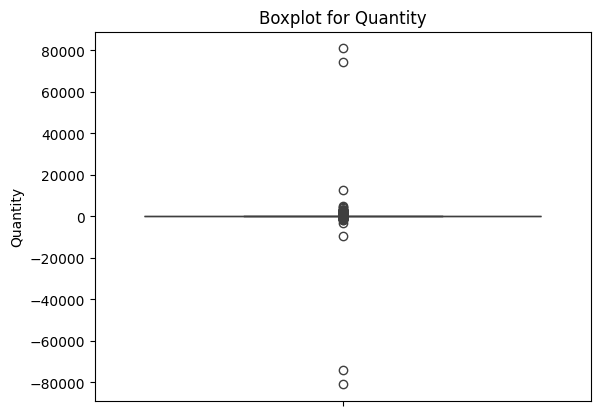


Most sold product:
Description
PACK OF 72 RETROSPOT CAKE CASES    14971
Name: Quantity, dtype: int64


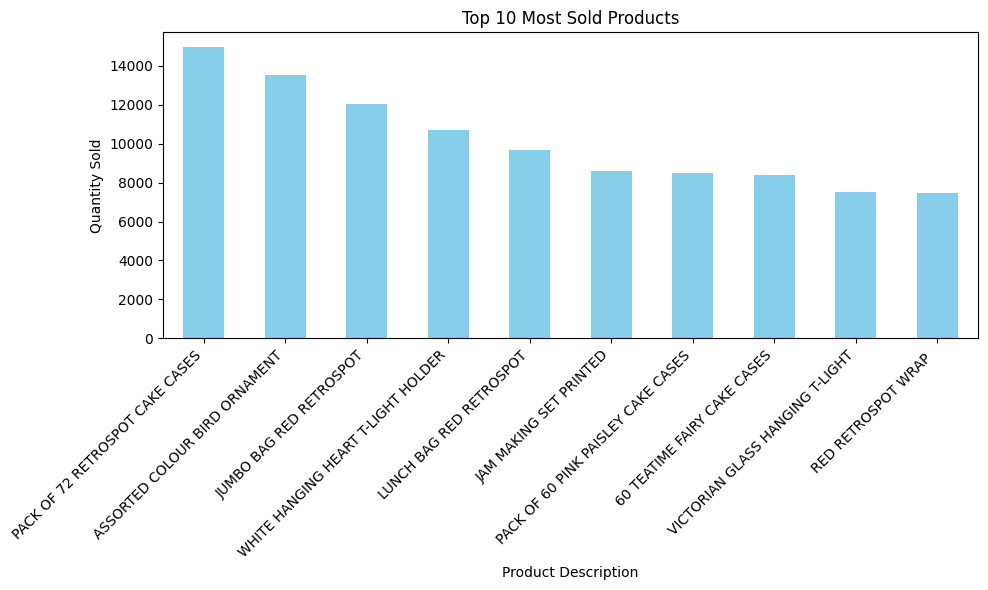


Top 3 customers eligible for giveaway:
      CustomerID  TotalSpend
1858     14911.0   107348.75
1275     14096.0    53251.74
556      13089.0    42179.93


<ipython-input-8-c0d85283c47e>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_sales, x='DayType', y='TotalSales', palette='viridis')


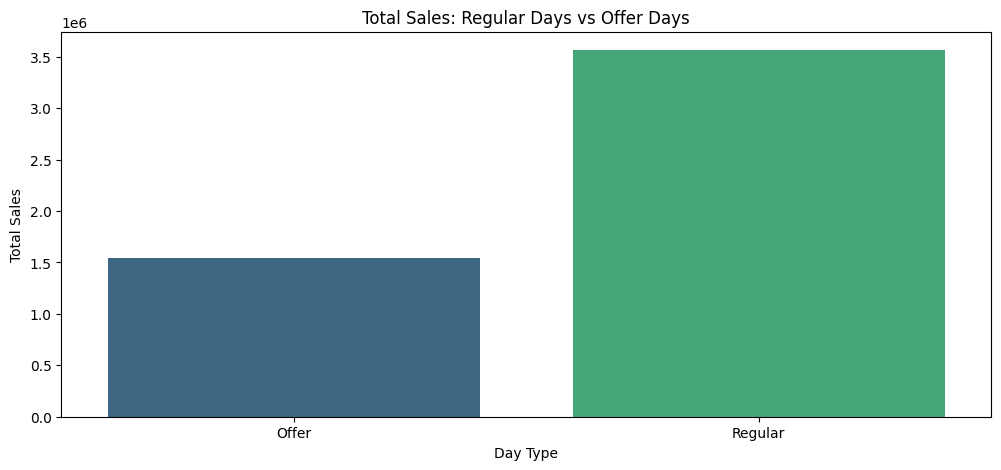

<ipython-input-8-c0d85283c47e>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_visits, x='DayType', y='CustomerVisits', palette='viridis')


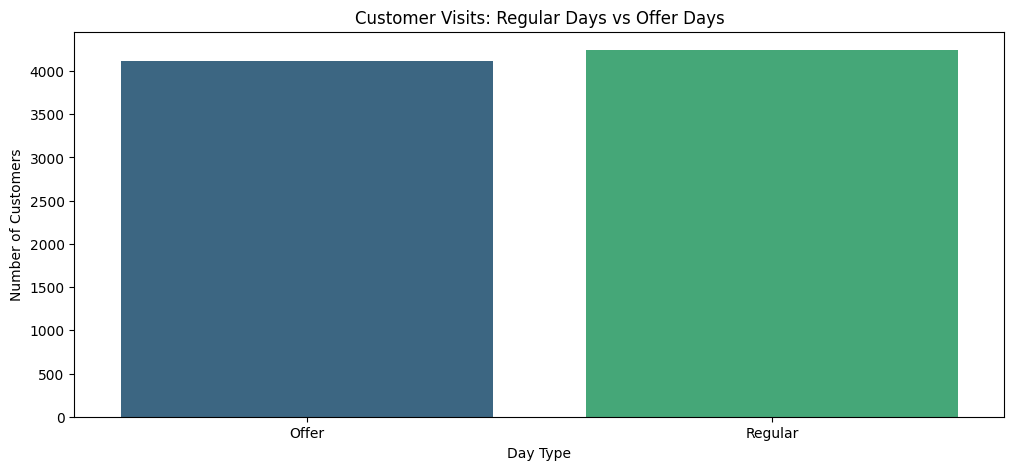

Mean Squared Error: 16482.66
R^2 Score: 0.22


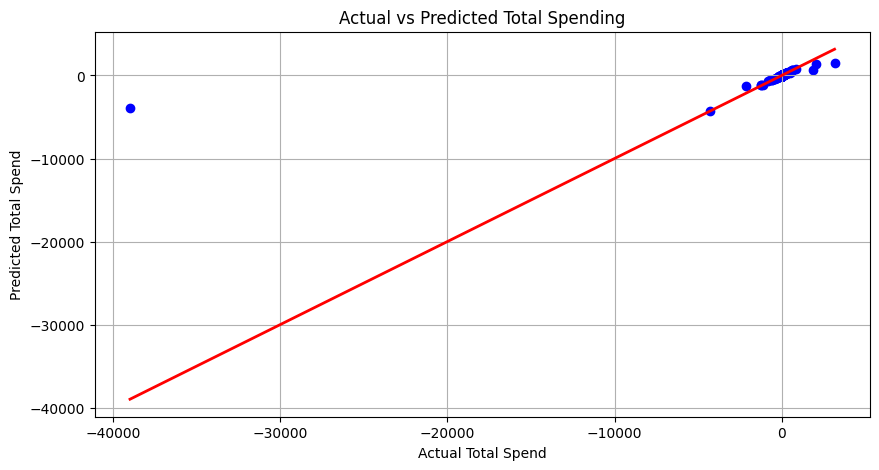

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset (make sure to use the correct path)
data = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

# Ensure 'InvoiceDate' is a datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Preview the data
print(data.head())
print(data.info())
print(data.describe())

# 1. Check and handle missing values
print("Missing values in each column:")
print(data.isnull().sum())
data.dropna(inplace=True)

# 2. Drop duplicates
data.drop_duplicates(inplace=True)

# 3. Outlier detection and removal for Quantity
sns.boxplot(data['Quantity'])
plt.title('Boxplot for Quantity')
plt.show()

Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Quantity'] >= (Q1 - 1.5 * IQR)) & (data['Quantity'] <= (Q3 + 1.5 * IQR))]

# 4. Finding the most sold product
product_sales = data.groupby('Description')['Quantity'].sum()
most_sold_product = product_sales.sort_values(ascending=False).head(1)
print("\nMost sold product:")
print(most_sold_product)

# 5. Top 10 most sold products visualization
top_products = product_sales.sort_values(ascending=False).head(10)
if not top_products.empty:
    plt.figure(figsize=(10, 6))
    top_products.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Most Sold Products')
    plt.xlabel('Product Description')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")

# 6. Calculate top 3 customers for the giveaway
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
customer_spend = data.groupby('CustomerID')['TotalSpend'].sum().reset_index()
top_customers = customer_spend.sort_values(by='TotalSpend', ascending=False).head(3)
print("\nTop 3 customers eligible for giveaway:")
print(top_customers)

# 7. Regular vs Offer Day Analysis
np.random.seed(42)  # For reproducibility
data['OfferDay'] = np.random.choice(['Regular', 'Offer'], size=len(data), p=[0.7, 0.3])

# Calculate total sales for each day type
day_sales = data.groupby('OfferDay')['TotalSpend'].sum().reset_index()
day_sales.columns = ['DayType', 'TotalSales']

# Count unique customers for each day type
customer_visits = data.groupby('OfferDay')['CustomerID'].nunique().reset_index()
customer_visits.columns = ['DayType', 'CustomerVisits']

# Visualizing Total Sales on Regular vs Offer Days
plt.figure(figsize=(12, 5))
sns.barplot(data=day_sales, x='DayType', y='TotalSales', palette='viridis')
plt.title('Total Sales: Regular Days vs Offer Days')
plt.ylabel('Total Sales')
plt.xlabel('Day Type')
plt.show()

# Visualizing Customer Visits on Regular vs Offer Days
plt.figure(figsize=(12, 5))
sns.barplot(data=customer_visits, x='DayType', y='CustomerVisits', palette='viridis')
plt.title('Customer Visits: Regular Days vs Offer Days')
plt.ylabel('Number of Customers')
plt.xlabel('Day Type')
plt.show()

# 8. Predictive Analysis with Machine Learning
# Preparing data for predictive analysis
features = data[['Quantity', 'UnitPrice']]  # You can add more features if available
target = data['TotalSpend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualizing the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
# Use y_test for the line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Total Spending')
plt.xlabel('Actual Total Spend')
plt.ylabel('Predicted Total Spend')
plt.grid()
plt.show()
